In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
class waveform:
    def __init__(self, length=100, wave_function=None, on_voltage=1):
        self.array = np.arange(0, length)
        self.period = len(self.array)
        self.on_voltage = on_voltage
        self.__function = wave_function
        self.wave = self.__create_wave()

    def __create_wave(self):
        return self.__function(self.array)

class sinusoid(waveform):
    def __init__(self):
        super().__init__(wave_function=self.__sinusoid)

    def __sinusoid(self, t):
        return np.sin((2 * np.pi / self.period) * t)  

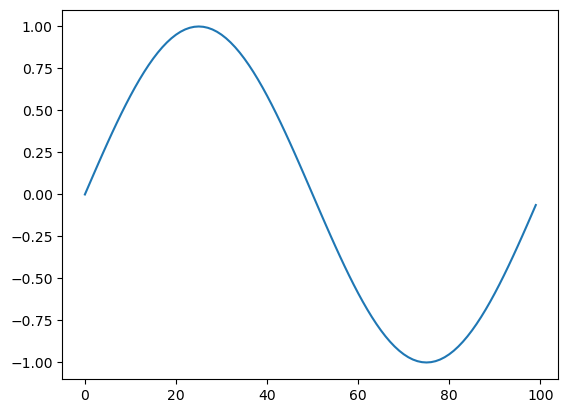

In [20]:
wave1 = sinusoid()

plt.plot(wave1.wave)

In [21]:
import sys
sys.path.insert(0, "../modules/")
from waveforms import *
from build_training_csv import Testing_file_maker as fm

In [22]:
# Collection of waveforms to train with
squares = []
trapezoids = []
triangles = []
PERIOD = 100

# Add square waves
for duty in range(10, 90, 2):
    duty_percentage = duty / 100
    squares.append(Square_wave(duty_cyle=duty_percentage, dc_bias=4))

# Add trapezoid waves
for top_time in range(10, 50, 2):
    for top_width in range(5, 25, 5):
        for bot_time in range((top_time + top_width + 10), PERIOD):
            trapezoids.append(Trapezoid_wave(t_reach_top=top_time, 
                                                      top_width=top_width, 
                                                      t_reach_bot=bot_time,
                                                      dc_bias=4))

# Add triangle waves
for top_time in range(10, 50, 2):
    for bot_time in range(top_time + 10, PERIOD):
        triangles.append(Trapezoid_wave(t_reach_top=top_time, 
                                                      top_width=0, 
                                                      t_reach_bot=bot_time,
                                                      dc_bias=4))
        

# Add all waveforms together
waveform_collection = squares + trapezoids + triangles
waves = [x.wave for x in waveform_collection]

In [23]:
data = fm(waves, freq_bottom=1e6, freq_top=1e8, num_freq_steps=9, dc_bias=4)
data.training_dataframe.to_csv("~/Desktop/test.csv")

In [24]:
pd.set_option('display.max_columns', 10)
data.training_dataframe.head(n=10)

,frequency,dc_bias,v0,v1,v2,...,v95,v96,v97,v98,v99
0,1000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
1,12000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
2,23000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
3,34000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
4,45000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
5,56000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
6,67000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
7,78000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
8,89000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
9,100000000.0,4,4.0,4.5,4.5,...,3.5,3.5,3.5,3.5,3.5
